Numerical Python

In [361]:
# setup 
from sympy import Eq, cos, pi
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing(use_latex='mathjax')
plt.rcParams['figure.figsize'] = (12, 8)  # (width, height)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16
get_ipython().magic('matplotlib inline') # inline plotting

In [362]:
t,k,m,c = sp.symbols('t,k,m,c')
x = sp.Function('x') # (t)

In [363]:
k_ = 124e3  # spring constant, kN/m
m_ = 64.2 # mass, Kg
c_ = 3  # damping coefficient 
g_ = 9.8 # metres per second**2

omega = 1.0 # frequency
phi = 0.0 # phase shift
A = 5.0 # amplitude

In [364]:
#ode = k*x(t) + c*x(t).diff(t,1) + m*x(t).diff(t,2) + m*g_ - A*cos(2*pi*omega*t - phi)
ode = -k*x(t)/m -c*x(t).diff(t,1)-g_ + A*cos(2*pi*omega*t - phi) - x(t).diff(t,2)
ode

                                             2            
    d          k⋅x(t)                       d             
- c⋅──(x(t)) - ────── + 5.0⋅cos(2.0⋅π⋅t) - ───(x(t)) - 9.8
    dt           m                           2            
                                           dt             

In [365]:
Eq(ode)

                                             2                
    d          k⋅x(t)                       d                 
- c⋅──(x(t)) - ────── + 5.0⋅cos(2.0⋅π⋅t) - ───(x(t)) - 9.8 = 0
    dt           m                           2                
                                           dt                 

In [366]:
ode_sol = sp.dsolve(ode)
ode_sol

             ⎛         __________⎞         ⎛         __________⎞              
             ⎜        ╱  2   4⋅k ⎟         ⎜        ╱  2   4⋅k ⎟              
           t⋅⎜-c -   ╱  c  - ─── ⎟       t⋅⎜-c +   ╱  c  - ─── ⎟              
             ⎝     ╲╱         m  ⎠         ⎝     ╲╱         m  ⎠              
           ───────────────────────       ───────────────────────              
                      2                             2                      31.
x(t) = C₁⋅ℯ                        + C₂⋅ℯ                        + ───────────
                                                                              
                                                                   39.47841760

                                                                              
                                                                              
                                                                              
                                                   

In [367]:
ode_sol.lhs

x(t)

In [368]:
ode_sol.rhs

      ⎛         __________⎞         ⎛         __________⎞                     
      ⎜        ╱  2   4⋅k ⎟         ⎜        ╱  2   4⋅k ⎟                     
    t⋅⎜-c -   ╱  c  - ─── ⎟       t⋅⎜-c +   ╱  c  - ─── ⎟                     
      ⎝     ╲╱         m  ⎠         ⎝     ╲╱         m  ⎠                     
    ───────────────────────       ───────────────────────                     
               2                             2                      31.4159265
C₁⋅ℯ                        + C₂⋅ℯ                        + ──────────────────
                                                                              
                                                            39.4784176043574⋅c

                                                                              
                                                                              
                                                                              
                                                   

In [369]:
# initial conditions with displacement x=1 at t=0 and x=0 at t=1
#x0 = 1
#x1 = 0
#ics = {x(0): x0, x(1):x1}
#print(ics)
#C_eq = { Eq(ode_sol.lhs.subs(x(t),0), ode_sol.rhs.subs(t,1)) , Eq(ode_sol.lhs.subs(x(t),1), ode_sol.rhs.subs(t,0)) }
#C_eq

In [370]:
x0 = 0
v0 = 1.2
C_eq = { Eq(ode_sol.lhs.subs(x(t),x0), ode_sol.rhs.subs(t,0)) , 
         Eq(ode_sol.lhs.subs(x(t),v0), ode_sol.rhs.diff(t).subs(t,0) ) }
C_eq

   ⎛⎡                                                                         
   ⎜⎢                                                                         
   ⎜⎢                                                                         
   ⎜⎢                                   5.0⋅k⋅m                               
set⎜⎢0 = C₁ + C₂ + ────────────────────────────────────────────────── - ──────
   ⎜⎢                                2  2                           2         
   ⎝⎣              39.4784176043574⋅c ⋅m  + (k - 39.4784176043574⋅m)    39.478

                                                               ⎛          ____
                                                               ⎜         ╱  2 
                           2                                   ⎜        ╱  c  
         197.392088021787⋅m                    9.8⋅m           ⎜  c   ╲╱      
──────────────────────────────────────────── - ─────, 1.2 = C₁⋅⎜- ─ - ────────
            2  2                           2     k 

In [371]:
known_params = {m,c,k,t}
const = ode_sol.free_symbols - known_params
const

set([C₁, C₂])

In [372]:
Csol = sp.solve(C_eq,const)
Csol

⎧         ⎛                                                                   
⎪         ⎜                                                                   
⎪         ⎜                      3  3                         2    2          
⎪    -0.1⋅⎜4.83610615653378e+28⋅c ⋅m  + 1.18435252813072e+28⋅c ⋅k⋅m  - 4.83610
⎪         ⎝                                                                   
⎨C₁: ─────────────────────────────────────────────────────────────────────────
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎩                                                                             

                         ______________                                       
                        ╱  2                       

In [373]:
ode_sol = ode_sol.subs(Csol).subs({m:64.2, c:3, k:124e3})
ode_sol

                                                                              
                                                                              
                                                                              
x(t) = 2.48868082628384e-44⋅ⅈ⋅(5.50490806141555e+41 - 4.88493181321424e+40⋅ⅈ)⋅

 t⋅(-3 - 87.8456413137232⋅ⅈ)                                                  
 ───────────────────────────                                                  
              2                                                               
ℯ                            - 2.48868082628384e-44⋅ⅈ⋅(5.50490806141555e+41 + 

                         t⋅(-3 + 87.8456413137232⋅ⅈ)                          
                         ───────────────────────────                          
                                      2                                       
4.88493181321424e+40⋅ⅈ)⋅ℯ                            + 2.63264497884523e-5⋅sin

                                                 

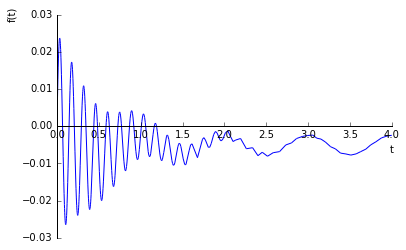

In [374]:
sp.plot(ode_sol.rhs, (t,0,4)) ;